![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Finance/10.Financial_Visual_Document_Understanding.ipynb)

# Financial Visual Document Understanding

#Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install johnsnowlabs 

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [3]:
from johnsnowlabs import * 
# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
# Make sure to restart your notebook afterwards for changes to take effect
jsl.install()

👌 Detected license file /content/4.2.0.spark_nlp_for_healthcare-2.json
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up if John Snow Labs home exists in /root/.johnsnowlabs this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
👌 Detected license file /content/4.2.0.spark_nlp_for_healthcare-2.json
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.0-py3-none-any.whl to /usr/bin/python3
Running: /usr/bin/python3 -m pip install /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.0-py3-none-any.whl
👌 Detected license file /content/4.2.0.spark_nlp_for_healthcare-2.json
Installing /root/.johnsnowlabs/py_installs/spark_ocr-4.1.0-py3-none-any.whl to /usr/bin/python3
Running: /usr/bin/python3 -m pip install /root/.johnsnowlabs/py_installs/spark_ocr-4.1.0-py3-none-any.whl
👌 Detected license file /content/4.2.0.spark_nlp_for_healthcare-2.json
Installing /root/.johnsnowlabs/py_installs/spark_n

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>After running previous cell, <font color='darkred'>RESTART the COLAB RUNTIME </font> and go ahead with the following codes .<b>

In [1]:
from johnsnowlabs import * 
# Automatically load license data and start a session with all jars user has access to
spark = jsl.start()

DEBUG START!
👌 Detected license file /content/4.2.0.spark_nlp_for_healthcare-2.json
👌 Launched cpu-Optimized JVM SparkSession with Jars for: 🚀Spark-NLP==4.2.0, 💊Spark-Healthcare==4.2.0, 🕶Spark-OCR==4.1.0, running on ⚡ PySpark==3.1.2


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# if you want to start the session with custom params as in start function above
def start(SECRET):
    builder = SparkSession.builder \
        .appName("Spark NLP Licensed") \
        .master("local[*]") \
        .config("spark.driver.memory", "16G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "2000M") \
        .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:"+PUBLIC_VERSION) \
        .config("spark.jars", "https://pypi.johnsnowlabs.com/"+SECRET+"/spark-nlp-jsl-"+JSL_VERSION+".jar")
      
    return builder.getOrCreate()

#spark = start(SECRET)


******************************
# <b><h1><font color='orange'>This notebook consists of four parts :</font><h1><b>

  ### - Spark OCR Visual Document Classification
  ### - Signature Detection 
  ### - Table Recognition
  ### - Receipt Binary Classification
******************************

## Download and Read Sample images

In [3]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-ocr-workshop/master/jupyter/data/signature/image_147.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_advertisement2.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_%20letter2.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_advertisement.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_budget2.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_email2.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_form.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_invoice3.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_invoice4.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_letter.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_news%20article.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_presentation.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/ocr/data/visual_document_examples/Document_resume.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-ocr-workshop/master/jupyter/data/tab_images/cTDaR_t10168.jpg
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-ocr/master/python/sparkocr/resources/ocr/images/check.jpg?token=GHSAT0AAAAAABVMES4Q2ZOJEOUXLTCY7TDCYZDDW3A
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/visual_document_sample_images/financial_table_extraction.png

In [4]:
sample_images = spark.read.format("binaryFile").load("*.png").cache()
sample_images.show()

+--------------------+--------------------+-------+--------------------+
|                path|    modificationTime| length|             content|
+--------------------+--------------------+-------+--------------------+
|file:/content/ima...|2022-10-05 22:07:...|1799448|[FF D8 FF E0 00 1...|
|file:/content/Doc...|2022-10-05 22:07:...|1364836|[89 50 4E 47 0D 0...|
|file:/content/Doc...|2022-10-05 22:07:...| 876092|[89 50 4E 47 0D 0...|
|file:/content/Doc...|2022-10-05 22:07:...| 465896|[FF D8 FF E0 00 1...|
|file:/content/Doc...|2022-10-05 22:07:...| 463618|[FF D8 FF E0 00 1...|
|file:/content/Doc...|2022-10-05 22:07:...| 341744|[FF D8 FF E0 00 1...|
|file:/content/Doc...|2022-10-05 22:07:...| 305933|[FF D8 FF E0 00 1...|
|file:/content/Doc...|2022-10-05 22:07:...| 235098|[FF D8 FF DB 00 8...|
|file:/content/Doc...|2022-10-05 22:07:...| 230268|[FF D8 FF E0 00 1...|
|file:/content/Doc...|2022-10-05 22:07:...| 215445|[89 50 4E 47 0D 0...|
|file:/content/Doc...|2022-10-05 22:07:...| 147605|

# Display images

In [5]:
image_df = ocr.BinaryToImage().transform(sample_images)
ocr.display_images(image_df)

Output hidden; open in https://colab.research.google.com to view.

# Spark OCR Visual Document Classification

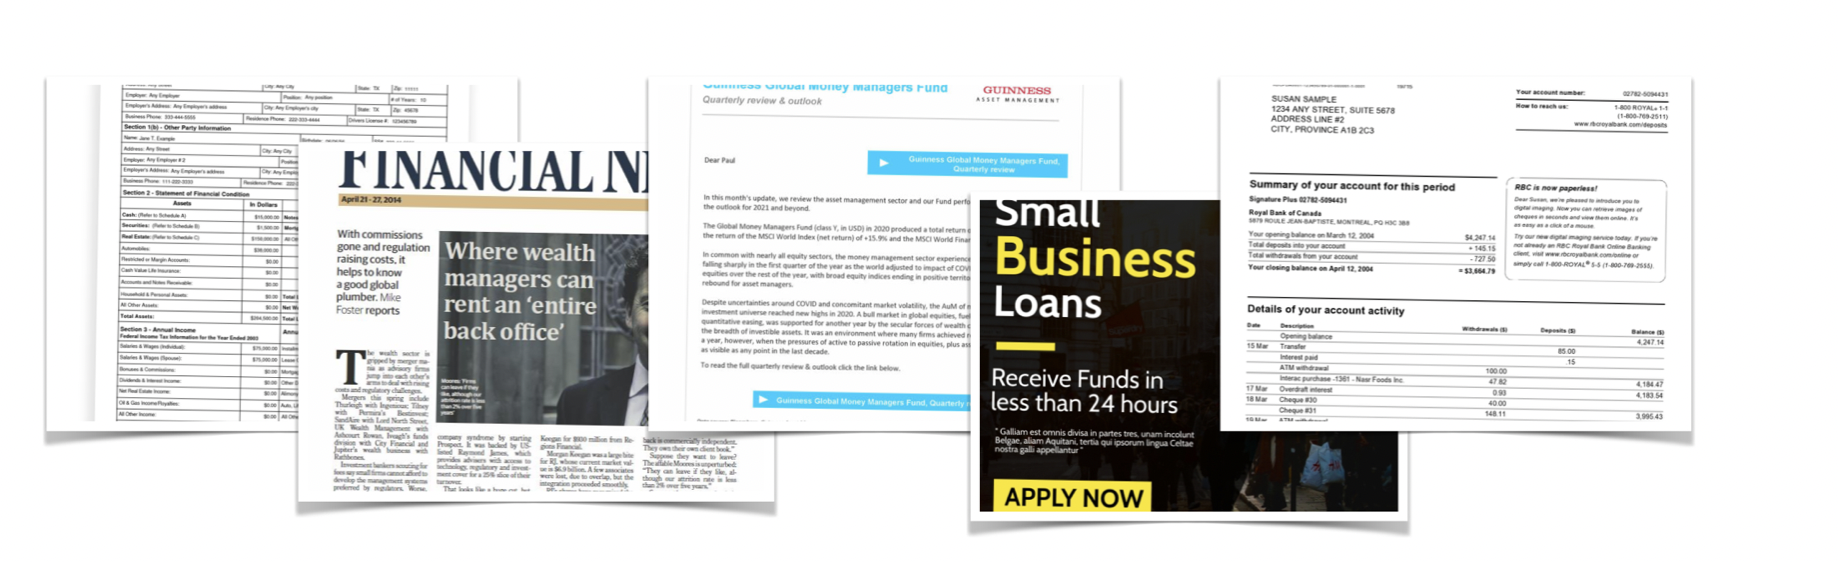

🔎With this model, you can classify financial documents using text and layout data with new features offered by Spark OCR.

🔎Classes detected by the model:

`letter`
`form`
`email`
`handwritten`
`advertisement`
`scientific report`
`scientific publicatio`
`specification`
`file folder`
`news article`
`budget`
`invoice`
`presentation`
`questionnaire`
`resume`
`memo`

In [6]:
# from sparkocr.utils import get_vocabulary_dict

binary_to_image = ocr.BinaryToImage()\
    .setOutputCol("image") \
    .setImageType(ocr.ImageType.TYPE_3BYTE_BGR)

doc_class = ocr.VisualDocumentClassifierV3() \
    .pretrained("dit_base_finetuned_rvlcdip", "en", "clinical/ocr") \
    .setInputCols(["image"])\
    .setOutputCol("label")

pipeline = PipelineModel(stages=[binary_to_image,
                                 doc_class])

In [7]:
results = pipeline.transform(sample_images).cache()

In [8]:
results

image,path,modificationTime,length,pagenum,label,exception
{file:/content/im...,file:/content/ima...,2022-10-05 22:07:...,1799448,0,letter,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,1364836,0,invoice,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,876092,0,presentation,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,465896,0,resume,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,463618,0,form,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,341744,0,budget,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,305933,0,advertisement,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,235098,0,advertisement,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,230268,0,letter,null
{file:/content/Do...,file:/content/Doc...,2022-10-05 22:07:...,215445,0,letter,null


In [9]:
results.select("image", "label")

image,label
{file:/content/im...,letter
{file:/content/Do...,invoice
{file:/content/Do...,presentation
{file:/content/Do...,resume
{file:/content/Do...,form
{file:/content/Do...,budget
{file:/content/Do...,advertisement
{file:/content/Do...,advertisement
{file:/content/Do...,letter
{file:/content/Do...,letter


### Our Visual Document Classifier model has predicted the class of each image as seen above,  some of the documents are `financial`.

# Signature Detection 

## Display Image

In [10]:
imagePath = "./image_147.png"

# Read image file as binary file
df = spark.read.format("binaryFile").load(imagePath)

ocr.display_images(ocr.BinaryToImage().transform(df), "image")

Output hidden; open in https://colab.research.google.com to view.

ImageHandwrittenDetector is a DL model for detect handwritten text on the image.

Detector support following labels:

`signature`
`date`
`name`
`title`
`address`
`others`

We will detect `signature` here :

## Define OCR Pipeline for Signature Detection 

In [11]:
binary_to_image = ocr.BinaryToImage()
binary_to_image.setImageType(ocr.ImageType.TYPE_3BYTE_BGR)

pretrained_model = ("image_handwritten_detector_gsa0628", "en", "public/ocr/models")
signature_detector =  ocr.ImageHandwrittenDetector() \
    .pretrained(*pretrained_model) \
    .setInputCol("image") \
    .setOutputCol("signature_regions") \
    .setOutputLabels(["signature"]) \
    .setScoreThreshold(0.4)

draw_regions =  ocr.ImageDrawRegions() \
   .setInputCol("image") \
   .setInputRegionsCol("signature_regions") \
   .setOutputCol("image_with_regions") \
   .setFontSize(16) \
   .setRectColor(ocr.Color.red)

pipeline = PipelineModel(stages=[
    binary_to_image,
    signature_detector,
    draw_regions
])

image_handwritten_detector_gsa0628 download started this may take some time.
Approximate size to download 243.9 MB


In [12]:
result =  pipeline.transform(df).cache()
ocr.display_images(result, "image_with_regions")

Output hidden; open in https://colab.research.google.com to view.

### Display coordinates of regions

In [13]:
## since pyspark2.3 doesn't have element_at, 'getItem' is involked
path_array = F.split(result['path'], '/')

# from pyspark2.4
results.withColumn("filename", F.element_at(F.split("path", "/"), -1)) \

result.withColumn("coordinate", F.explode_outer(result["signature_regions"])) \
    .withColumn('filename', path_array.getItem(F.size(path_array)- 1)) \
    .withColumn('signed', F.size(result["signature_regions"]) > 0) \
    .select("filename", "signed", "coordinate") \
    .show(truncate=False)

+-------------+------+---------------------------------------------------------------+
|filename     |signed|coordinate                                                     |
+-------------+------+---------------------------------------------------------------+
|image_147.png|true  |{0, 0, 1628.0, 2273.0, 375.0, 251.0, 0.7170037, signature, 0.0}|
+-------------+------+---------------------------------------------------------------+



# Table Recognition


## Dısplay Image


    Image #0:
    Origin: file:/content/financial_table_extraction.png
    Resolution: 0 dpi
    Width: 595 px
    Height: 842 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


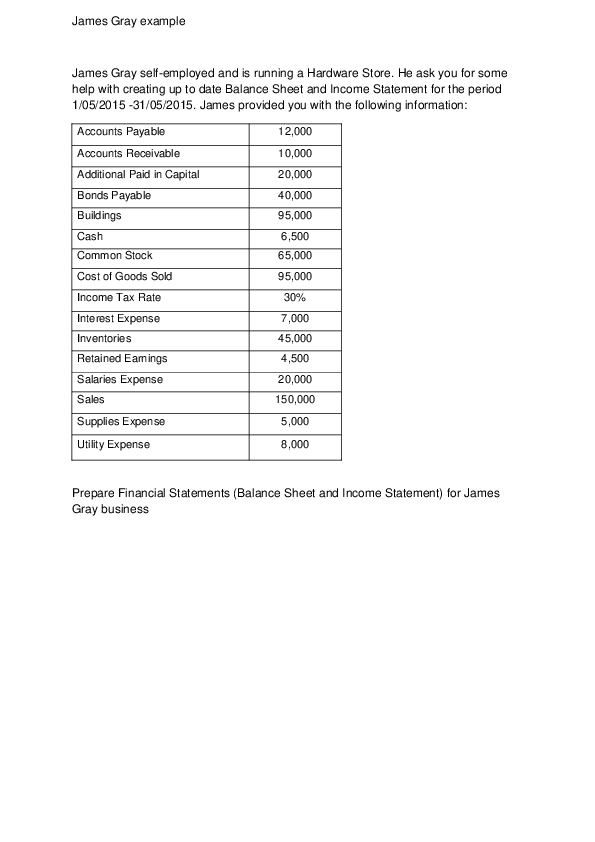

In [14]:
imagePath = "./financial_table_extraction.png"

# Read image file as binary file
df = spark.read.format("binaryFile").load(imagePath)

ocr.display_images(ocr.BinaryToImage().transform(df), "image")

🔎 `ImageTableDetector` is a DL model for detecting tables on the image.
`ImageTableCellDetector` detect cells in a table image.
`ImageCellsToTextTable` runs OCR for cells regions on image, return recognized text to outputCol as TableContainer structure.

## Define OCR Pipeline for Table Recognition

In [15]:
binary_to_image =  ocr.BinaryToImage()

table_detector =  ocr.ImageTableDetector.pretrained("general_model_table_detection_v2", "en", "clinical/ocr")
table_detector.setInputCol("image")
table_detector.setOutputCol("region")

splitter =  ocr.ImageSplitRegions()
splitter.setInputCol("image")
splitter.setInputRegionsCol("region")
splitter.setOutputCol("table_image")
splitter.setDropCols("image")
splitter.setImageType(ocr.ImageType.TYPE_BYTE_GRAY)

scaler =  ocr.ImageScaler()
scaler.setInputCol("table_image")
scaler.setOutputCol("scaled_image")
scaler.setScaleFactor(2)

cell_detector =  ocr.ImageTableCellDetector()
cell_detector.setInputCol("scaled_image")
cell_detector.setOutputCol("cells")
cell_detector.setKeepInput(True)

table_recognition =  ocr.ImageCellsToTextTable()
table_recognition.setInputCol("scaled_image")
table_recognition.setCellsCol('cells')
table_recognition.setMargin(2)
table_recognition.setStrip(True)
table_recognition.setOutputCol('table')

pipeline = PipelineModel(stages=[
    binary_to_image,
    table_detector,
    splitter,
    scaler,
    cell_detector,
    table_recognition
])

general_model_table_detection_v2 download started this may take some time.
Approximate size to download 264.7 MB



    Image #0:
    Origin: file:/content/financial_table_extraction.png
    Resolution: 0 dpi
    Width: 273 px
    Height: 340 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


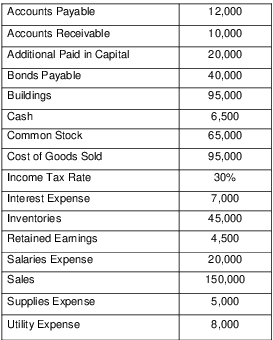

In [16]:
results = pipeline.transform(df).cache()
ocr.display_images(results, "table_image")

## Display recognized tables

In [17]:
# from sparkocr.utils import display_images, display_tables, display_table
ocr.display_tables(results)

Filename: financial_table_extraction.png
Page:     0
Table:    0


,col0,col1
0,Accounts Payable,"12,000"
1,Accounts Receivable,"10,000"
2,Additional Paid in Capital,"20,000"
3,Bonds Payable,"40,000"
4,Buildings,"95,000"
5,Cash,"6,500"
6,Common Stock,"65,000"
7,Cost of Goods Soki,"95,000"
8,Income Tax Rate,W%
9,Interest Expense,"7,000"


# Receipy Binary Classification

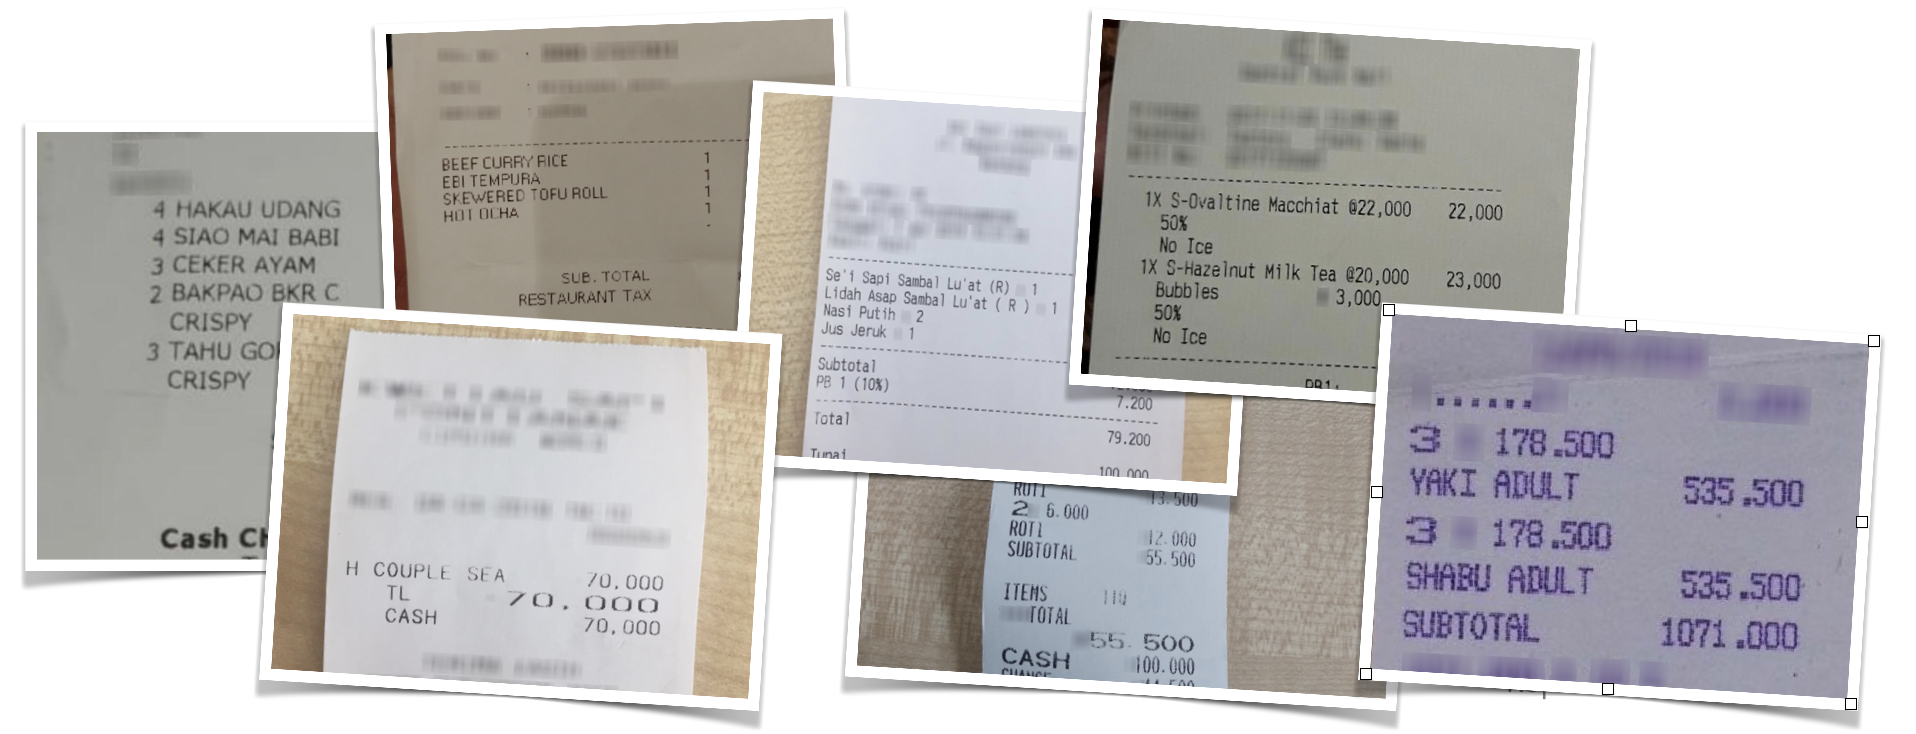

🔎 With this model, you can detect Receipts on both scanned and mobile images using Financial Image Transformers (ViT) in Spark NLP. You can use this model to retrieve all the images which are tickets and then process then using VisualNER, OCR, etc.

🔎 **`finvisualclf_tickets`** is a ViT (Visual Transformer) model, which can be used to carry out Binary Classification (true or false) on pictures / photos / images. 

🔎 Classes detected by the model:

* **ticket**
* **no_ticket** 

## Download Sample images

In [18]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/finance/data/receipt_image_examples/image01.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/finance/data/receipt_image_examples/image02.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/finance/data/receipt_image_examples/image03.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/finance/data/receipt_image_examples/image04.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/finance/data/receipt_image_examples/image05.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/streamlit_notebooks/finance/data/receipt_image_examples/image06.png

## Load test images

In [19]:
test_image = spark.read\
    .format("image")\
    .option("dropInvalid", value = True)\
    .load("*image0*.png").toDF("image")

In [20]:
test_image.select("image.origin", "image.width", "image.height").show(truncate=False)

+---------------------------+-----+------+
|origin                     |width|height|
+---------------------------+-----+------+
|file:///content/image05.png|960  |1280  |
|file:///content/image01.png|1108 |1478  |
|file:///content/image02.png|1920 |2889  |
|file:///content/image06.png|1556 |1760  |
|file:///content/image04.png|1275 |1650  |
|file:///content/image03.png|1108 |1478  |
+---------------------------+-----+------+



In [21]:
document_assembler =  nlp.ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

imageClassifier_loaded = nlp.ViTForImageClassification.pretrained("finvisualclf_vit_tickets", "en", "finance/models")\
  .setInputCols(["image_assembler"])\
  .setOutputCol("classes")

pipeline = Pipeline().setStages([
    document_assembler,
    imageClassifier_loaded
])

finvisualclf_vit_tickets download started this may take some time.
Approximate size to download 306.9 MB
[OK!]


In [22]:
result = pipeline.fit(test_image).transform(test_image).cache()

In [23]:
result.show()

+--------------------+--------------------+--------------------+
|               image|     image_assembler|             classes|
+--------------------+--------------------+--------------------+
|{file:///content/...|[{image, file:///...|[{category, 0, 5,...|
|{file:///content/...|[{image, file:///...|[{category, 0, 5,...|
|{file:///content/...|[{image, file:///...|[{category, 0, 8,...|
|{file:///content/...|[{image, file:///...|[{category, 0, 8,...|
|{file:///content/...|[{image, file:///...|[{category, 0, 8,...|
|{file:///content/...|[{image, file:///...|[{category, 0, 5,...|
+--------------------+--------------------+--------------------+



In [24]:
result_df = result.select(F.explode(F.arrays_zip(result.classes.result, 
                                                 result.classes.metadata)).alias("cols"))\
                  .select(F.expr("cols['1']['origin']").alias("images"),
                          F.expr("cols['0']").alias("class"),
                          F.expr("cols['1']['Some(ticket)']").alias("ticket_confidence"),
                          F.expr("cols['1']['Some(no_ticket)']").alias("no_ticket_confidence"))
                          

result_df.show(truncate=False)

+---------------------------+---------+-----------------+--------------------+
|images                     |class    |ticket_confidence|no_ticket_confidence|
+---------------------------+---------+-----------------+--------------------+
|file:///content/image05.png|ticket   |0.99478793       |0.0052120965        |
|file:///content/image01.png|ticket   |0.9956969        |0.004303068         |
|file:///content/image02.png|no_ticket|8.1447844E-4     |0.9991855           |
|file:///content/image06.png|no_ticket|8.130493E-4      |0.99918693          |
|file:///content/image04.png|no_ticket|8.138706E-4      |0.99918616          |
|file:///content/image03.png|ticket   |0.99545777       |0.0045422455        |
+---------------------------+---------+-----------------+--------------------+

